In [1]:
import os
import logging
import pandas as pd
import matplotlib.pyplot as plt

# Import classes and functions from the fits_metadata_extractor package
from fits_metadata_extractor.processor import FITSProcessor
from fits_metadata_extractor.utils import save_metadata_to_csv, load_metadata_from_csv
from fits_metadata_extractor.search import search_fits_by_point, search_fits_by_region
from fits_metadata_extractor.plotter import plot_moc_and_polygon_from_dataset_notebook, test, plot_search_region_and_find_fits
from fits_metadata_extractor.logger import setup_logging


In [2]:
# Initialize and configure logging
logger = setup_logging()


In [3]:
# Define the directory containing FITS files
fits_directory = "fits_collection"  # <-- CHANGE THIS PATH TO YOUR TEST FITS FILES DIRECTORY

# Define the output CSV file path
output_csv = 'test_metadata.csv'

# Define the directory to save plots
plot_output_dir = 'test_plots'

if not os.path.isdir(fits_directory):
    logger.error(f"The specified FITS directory does not exist: {fits_directory}")
else:
    logger.info(f"FITS directory found: {fits_directory}")


2024-11-13 14:52:39,601 - INFO - FITS directory found: fits_collection


In [4]:
# Instantiate FITSProcessor with desired number of workers
processor = FITSProcessor(max_workers=5)

# Process the FITS directory
metadata_df = processor.process_fits_directory_parallel(fits_directory)


2024-11-13 14:52:39,609 - INFO - Processing file: fits_collection/G327.617-0.364_I4.fits
2024-11-13 14:52:39,609 - INFO - Processing file: fits_collection/SN1987A_cut_35_smHB.fits
2024-11-13 14:52:39,610 - INFO - Processing file: fits_collection/G351.702+0.672_atlasgal.fits
2024-11-13 14:52:39,610 - INFO - Processing file: fits_collection/5GHz_n_f.fits
2024-11-13 14:52:39,611 - INFO - Processing file: fits_collection/G351.632-0.459_atlasgal.fits
2024-11-13 14:52:39,613 - INFO - Inferred object name 'G327.617-0.364' for file 'fits_collection/G327.617-0.364_I4.fits'.
2024-11-13 14:52:39,615 - INFO - Inferred object name 'G351.702' for file 'fits_collection/G351.702+0.672_atlasgal.fits'.
2024-11-13 14:52:39,624 - INFO - Inferred object name 'G351.632-0.459' for file 'fits_collection/G351.632-0.459_atlasgal.fits'.
2024-11-13 14:52:39,653 - ERROR - Unexpected error during NED query for 'SNR1987A': The remote service returned the following error message.
ERROR: The object name that you have 

In [5]:
# Show metadata_df content 

logger.info(f"Metadata DataFrame describe: {metadata_df.head()}")


2024-11-13 14:52:42,947 - INFO - Metadata DataFrame describe:                       FITS_File  \
0  G351.702+0.672_atlasgal.fits   
1                 5GHz_n_f.fits   
2  G351.632-0.459_atlasgal.fits   
3        G327.617-0.364_I4.fits   
4      UGC_09618_S_2MASS_H.fits   

                                             Polygon  \
0  POLYGON ((351.8408317015 0.6008334535, 351.552...   
1  POLYGON ((84.72666731996323 -69.13945793625412...   
2  POLYGON ((351.7458316825 -0.5191667704999999, ...   
3  POLYGON ((327.7141602095 -0.4191667505, 327.51...   
4  POLYGON ((224.30832666152753 24.32279635279270...   

                                                 MOC  \
0  9/2717291 2717294 10/10869158-10869159 1086916...   
1                                         10/8472269   
2  9/2716914-2716915 10/10867613 10867615 1086765...   
3  9/2676076 10/10704293-10704295 10704300-107043...   
4  9/575820 575822-575823 575845 575856 575858-57...   

                                      Polygon_Coords 

In [6]:
# Save the extracted metadata to CSV
save_metadata_to_csv(metadata_df, output_csv)


2024-11-13 14:52:42,961 - INFO - Metadata successfully saved to test_metadata.csv.


In [7]:
# Load the metadata from CSV
metadata_loaded_df = load_metadata_from_csv(output_csv)

2024-11-13 14:52:42,971 - INFO - Metadata loaded from test_metadata.csv.


In [8]:
# Test plotting using plot_moc_and_polygon_from_dataset_notebook
logger.info("Testing plotting of MOCs and polygons.")

try:
    plot_moc_and_polygon_from_dataset_notebook(
        metadata_df=metadata_loaded_df,
        input_dir=fits_directory,
        output_dir=plot_output_dir,
        max_plots=2  # Limit to 5 plots for testing
    )
    logger.info("Finished plotting MOCs and polygons.")
except Exception as e:
    logger.error(f"Error occurred during plotting: {e}")


2024-11-13 14:52:42,977 - INFO - Testing plotting of MOCs and polygons.
2024-11-13 14:52:42,980 - INFO - Plots will be saved to: test_plots
2024-11-13 14:52:42,980 - INFO - No specific selection criteria provided. All FITS files will be plotted.
2024-11-13 14:52:42,980 - INFO - Generating 2 plots.


Generating Plots:   0%|          | 0/2 [00:00<?, ?it/s]

2024-11-13 14:52:43,088 - INFO - Calling _reproject_full in non-dask mode
2024-11-13 14:52:44,563 - INFO - Plot saved as G351.702+0.672_atlasgal.png
2024-11-13 14:52:44,564 - INFO - Plot saved: test_plots/G351.702+0.672_atlasgal.png
2024-11-13 14:52:44,624 - INFO - Calling _reproject_full in non-dask mode
2024-11-13 14:52:44,625 - ERROR - Failed to reproject or plot FITS data: Number of dimensions in input and output WCS should match
2024-11-13 14:52:45,006 - INFO - Plot saved as 5GHz_n_f.png
2024-11-13 14:52:45,007 - INFO - Plot saved: test_plots/5GHz_n_f.png
2024-11-13 14:52:45,008 - INFO - Finished plotting MOCs and polygons.


In [9]:
# Define a test point
test_point = {
    'ra': 150.0,  # Right Ascension in degrees
    'dec': 2.2    # Declination in degrees
}

logger.info(f"Testing search by point: RA={test_point['ra']}, Dec={test_point['dec']}")

# Perform the search
matching_fits_by_point = search_fits_by_point(metadata_loaded_df, test_point['ra'], test_point['dec'])

# Display results
if not matching_fits_by_point.empty:
    logger.info(f"FITS files containing the point (RA={test_point['ra']}, Dec={test_point['dec']}):")
    display(matching_fits_by_point[['FITS_File', 'Resolved_Object']])
else:
    logger.info("No FITS files found containing the specified point.")


2024-11-13 14:52:45,015 - INFO - Testing search by point: RA=150.0, Dec=2.2
2024-11-13 14:52:45,023 - INFO - No FITS files found containing the specified point.


In [10]:
# Define a test circular region
test_circle = {
    'type': 'circle',
    'center': (270.0, -29),  # Center RA and Dec in degrees
    'radius': 5          # Radius in degrees
}

logger.info(f"Testing search by circular region: Center RA={test_circle['center'][0]}, Dec={test_circle['center'][1]}, Radius={test_circle['radius']} degrees")

# Perform the search
matching_fits_by_circle = search_fits_by_region(metadata_loaded_df, test_circle)

# Display results
if not matching_fits_by_circle.empty:
    logger.info(f"FITS files intersecting the circular region (RA={test_circle['center'][0]}, Dec={test_circle['center'][1]}, Radius={test_circle['radius']} degrees):")
    display(matching_fits_by_circle[['FITS_File', 'Resolved_Object']])
else:
    logger.info("No FITS files found intersecting the specified circular region.")


2024-11-13 14:52:45,030 - INFO - Testing search by circular region: Center RA=270.0, Dec=-29, Radius=5 degrees
2024-11-13 14:52:45,039 - INFO - FITS files intersecting the circular region (RA=270.0, Dec=-29, Radius=5 degrees):


,FITS_File,Resolved_Object
12,av_galcen_2mass.fits,Unknown
13,id12_GAL-Survey-GC.fpsf.fits,Unknown
14,av_galcen_spitzer.fits,Unknown


In [11]:
# Define a test polygonal region
test_polygon = {
    'type': 'polygon',
    'coordinates': [
        (149.0, 1.0),
        (151.0, 1.0),
        (151.0, 3.0),
        (149.0, 3.0)
    ]
}

logger.info(f"Testing search by polygonal region with coordinates: {test_polygon['coordinates']}")

# Perform the search
matching_fits_by_polygon = search_fits_by_region(metadata_loaded_df, test_polygon)

# Display results
if not matching_fits_by_polygon.empty:
    logger.info("FITS files intersecting the polygonal region:")
    display(matching_fits_by_polygon[['FITS_File', 'Resolved_Object']])
else:
    logger.info("No FITS files found intersecting the specified polygonal region.")


2024-11-13 14:52:45,050 - INFO - Testing search by polygonal region with coordinates: [(149.0, 1.0), (151.0, 1.0), (151.0, 3.0), (149.0, 3.0)]
2024-11-13 14:52:45,058 - INFO - FITS files intersecting the polygonal region:


,FITS_File,Resolved_Object
6,2013.1.01292.S_SB_X4eb_GB_X4ec_MB_X4ed_2-38011...,Unknown
15,2013.1.00034.S_SB_X5_GB_X6_MB_X7_midz_cell10_2...,Unknown


2024-11-13 14:52:45,065 - INFO - Plots will be saved to: search_plots
2024-11-13 14:52:45,075 - INFO - Generating plots for 3 matching FITS files.


Plotting FITS Coverages:   0%|          | 0/3 [00:00<?, ?it/s]

2024-11-13 14:52:45,099 - ERROR - Failed to process FITS file 'id12_GAL-Survey-GC.fpsf.fits': 'MOC' object has no attribute 'to_icrs'
2024-11-13 14:52:45,612 - INFO - Search region and matching FITS coverages plotted and saved to 'search_plots/search_region_and_fits.png'


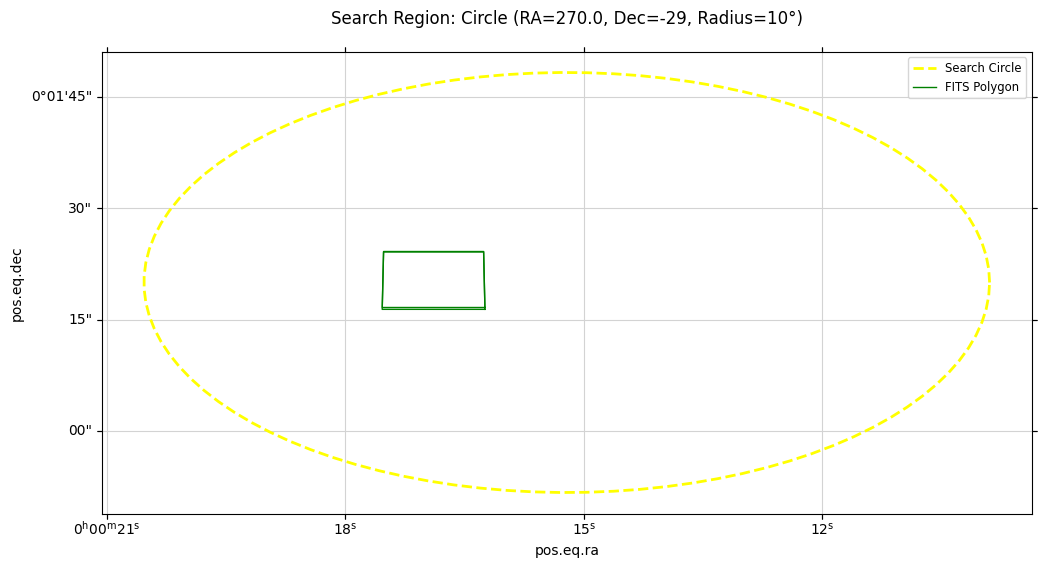

In [12]:
# Define a search region (e.g., a circle)
search_region = {
    'type': 'circle',
    'center': (270.0, -29),  # RA=150.0°, Dec=2.2°
    'radius': 10           # 5 degrees radius
}

# Call the plotting function
plot_search_region_and_find_fits(
    metadata_df=metadata_df,
    region=search_region,
    input_dir='fits_collection',
    output_dir='search_plots',
    max_plots=10,
    plot_search_region=True
)